##  랜덤포레스트 타율 모델

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [116]:
# 랜덤포레스트 안타수 모델
RUN_ONE =pd.read_csv(r'C:\Users\yuntaeyang\Desktop\svt_code\RUN_END.csv' , encoding = 'ms949' , index_col=0)
RUN_ONE1 = RUN_ONE.iloc[0:4642, :]
RUN_END = RUN_ONE.iloc[4642:4900, :] # 실제 예측해야하는 데이터
HIT_1 = RUN_ONE1.iloc[0:2680, :]
HIT_2 = RUN_ONE1.iloc[2680:2940, :]# test셋
HIT_3 = RUN_ONE1.iloc[2940:4642, :]

df = [HIT_1, HIT_3]
HIT_ONE= pd.concat(df)
HIT_ONE1 = HIT_ONE.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
HIT_ONE1

,HEADER_NO,BAT_PA,BAT_AB,BAT_RBI,BAT_HR,BAT_TOT_H,BAT_H3,BAT_H2,BAT_H1,BAT_SH,...,HS_PSN,HS_CQ,ERA,M_5,M_6,M_7,M_8,M_9,M_10,HIT_TARGET
0,0,23.380000,21.20,4.380000,0.372000,7.300000,0.040000,1.640000,5.620000,0.020000,...,0.016000,1.202581,5.594595,1,0,0,0,0,0,11.0
1,0,20.000000,18.90,2.500000,0.352000,4.460000,0.040000,1.000000,3.420000,0.220000,...,0.423529,0.906380,2.425150,1,0,0,0,0,0,14.0
2,0,23.020000,19.44,3.960000,0.164000,5.960000,0.040000,1.760000,4.160000,0.380000,...,0.021053,1.114818,4.816216,1,0,0,0,0,0,10.0
3,0,23.760000,19.78,2.820000,0.028000,5.620000,0.320000,0.860000,4.440000,0.000000,...,0.000000,0.971408,5.684211,1,0,0,0,0,0,7.0
4,0,20.880000,19.32,2.040000,0.192000,5.000000,0.400000,1.380000,3.220000,0.040000,...,0.000000,0.944277,3.724138,1,0,0,0,0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,0,20.500000,16.30,2.460000,0.172000,4.240000,0.000000,0.720000,3.520000,0.220000,...,0.000000,0.863194,3.836066,0,0,0,0,1,0,5.0
4638,1,22.306667,19.02,4.046667,0.450667,5.300000,0.133333,1.020000,4.146667,0.286667,...,0.057143,1.064419,4.187894,0,0,0,0,1,0,12.0
4639,1,22.193333,20.00,3.686667,0.672000,5.766667,0.000000,0.886667,4.880000,0.040000,...,0.021053,1.008079,6.793548,0,0,0,0,1,0,7.0
4640,2,22.306667,19.02,4.046667,0.450667,5.300000,0.133333,1.020000,4.146667,0.286667,...,0.057143,1.064419,4.187894,0,0,0,0,1,0,11.0


In [117]:
#GRIDSEARCH를 이용한 최적화
X_features = HIT_ONE1.iloc[:, :-1]
y_label = HIT_ONE1.iloc[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                                  test_size=0.2, random_state=0)


params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_hit = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_hit, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최적 예측 정확도: 0.0037


In [118]:
#안타수모델 학습
rf_hit = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=100)
rf_hit.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [119]:
# train rmse
rf_hit_predict = rf_hit.predict(X_train)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_hit_predict, y_train))) )

RMSE':3.4838054243113468


In [120]:
# varidation rmse
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__,'####')
    print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))
get_model_cv_prediction(rf_hit, X_test, y_test) 

#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE: 3.729


In [121]:
# test rmse
HIT_T= HIT_2.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
a = HIT_T.iloc[:, :-1]
b = HIT_T.iloc[:, -1]
rf_hit_predict = rf_hit.predict(a)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_hit_predict, b))) )

RMSE':3.367726666576336


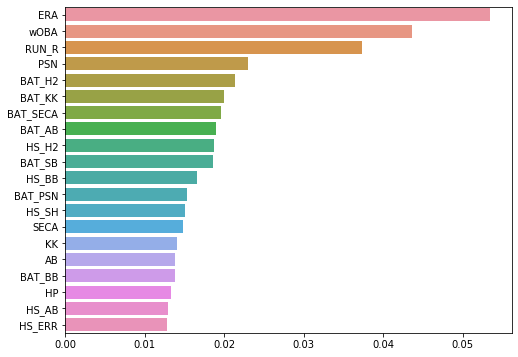

In [122]:
import matplotlib.pyplot as plt # 안타수모델 변수 중요도
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_hit.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [123]:
# 랜덤포레스트 타수모델
AB_1 = RUN_ONE1.iloc[0:2680, :]
AB_2 = RUN_ONE1.iloc[2680:2940, :]# test셋
AB_3 = RUN_ONE1.iloc[2940:4642, :] 
df = [AB_1, AB_3]
AB_ONE= pd.concat(df) 
AB_ONE1 = AB_ONE.drop(['RUN_TARGET','G_ID','T_ID', 'VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)

In [124]:
#GRIDSEARCH를 이용한 최적화
X_features = AB_ONE1.iloc[:, :-1]
y_label = AB_ONE1.iloc[:, -1]
X_train1, X_test1, y_train1, y_test1=train_test_split(X_features, y_label,
                                                  test_size=0.2, random_state=0)


params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_ab = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_ab, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train1, y_train1)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 100}
최적 예측 정확도: -0.0028


In [125]:
#타수모델 학습
X_ftr= AB_ONE1.iloc[:, :-1]
y = AB_ONE1.iloc[:, -1]
X_train1, X_test1, y_train1, y_test1=train_test_split(X_ftr, y,
                                                  test_size=0.2, random_state=0)
rf_AB = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=18, min_samples_split=8,n_estimators=100)
rf_AB.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=18,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [126]:
# train rmse
rf_AB_predict = rf_AB.predict(X_train1)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_AB_predict, y_train1))) )

RMSE':3.958027479277906


In [127]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__,'####')
    print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))
get_model_cv_prediction(rf_AB, X_test1, y_test1)

#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE: 4.279


In [128]:
# test rmse
AB_T= AB_2.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
a1 = AB_T.iloc[:, :-1]
b1 = AB_T.iloc[:, -1]
rf_AB_predict = rf_AB.predict(a1)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_AB_predict, b1))) )

RMSE':3.9052664744457766


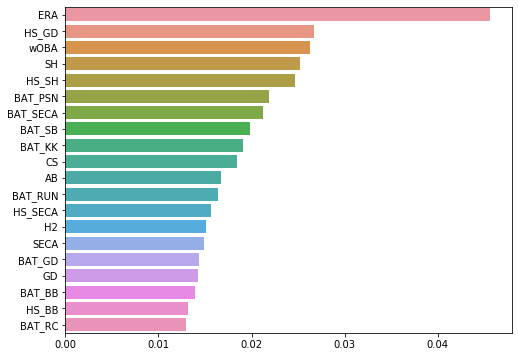

In [129]:
import matplotlib.pyplot as plt #타수모델 변수 중요도
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_AB.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

##  XGBOOST 타율 모델

In [130]:
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [131]:
# XGBOOST 안타수 모델 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

X = HIT_ONE1.iloc[:, :-1]
y = HIT_ONE1.iloc[:, -1]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'rmse',
              'objective':'reg:squarederror',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -4.311    |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        | -4.234    |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        | -4.023    |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        | -3.777    |  0.3      |  0.1      |  1.0      |  3.0      |  5.0      |  0.7      |
|  5        | -3.77     |  0.9      |  0.1      |  1.0      |  3.0      |  5.0      |  1.0      |
|  6        | -3.981    |  0.8442   |  0.2042   |  0.9952   |  3.07     |  5.322    |  0.7434   |
|  7        | -4.156    |  0.3      |  0.1      |  1.0      |  7.0      |  9.0      |  1.0      |
|  8        | -3.762    |  0.3      |  0.1      |  1.0      |  3.0      |  5.0      |  1.0      |


[0]	train-rmse:9.12428	eval-rmse:9.05821
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:8.36344	eval-rmse:8.30453
[2]	train-rmse:7.69195	eval-rmse:7.63686
[3]	train-rmse:7.10026	eval-rmse:7.0501
[4]	train-rmse:6.58183	eval-rmse:6.53459
[5]	train-rmse:6.12944	eval-rmse:6.0896
[6]	train-rmse:5.73552	eval-rmse:5.70443
[7]	train-rmse:5.39466	eval-rmse:5.37448
[8]	train-rmse:5.10006	eval-rmse:5.08955
[9]	train-rmse:4.84847	eval-rmse:4.85002
[10]	train-rmse:4.63426	eval-rmse:4.64465
[11]	train-rmse:4.45262	eval-rmse:4.47126
[12]	train-rmse:4.29872	eval-rmse:4.32645
[13]	train-rmse:4.17088	eval-rmse:4.2069
[14]	train-rmse:4.06238	eval-rmse:4.10974
[15]	train-rmse:3.97275	eval-rmse:4.0293
[16]	train-rmse:3.89663	eval-rmse:3.96158
[17]	train-rmse:3.83477	eval-rmse:3.90571
[18]	train-rmse:3.78332	eval-rmse:3.86167
[19]	train-rmse:3.73932	eval-rmse:3.82583
[20]	train-rmse:3.70431	eval-rm

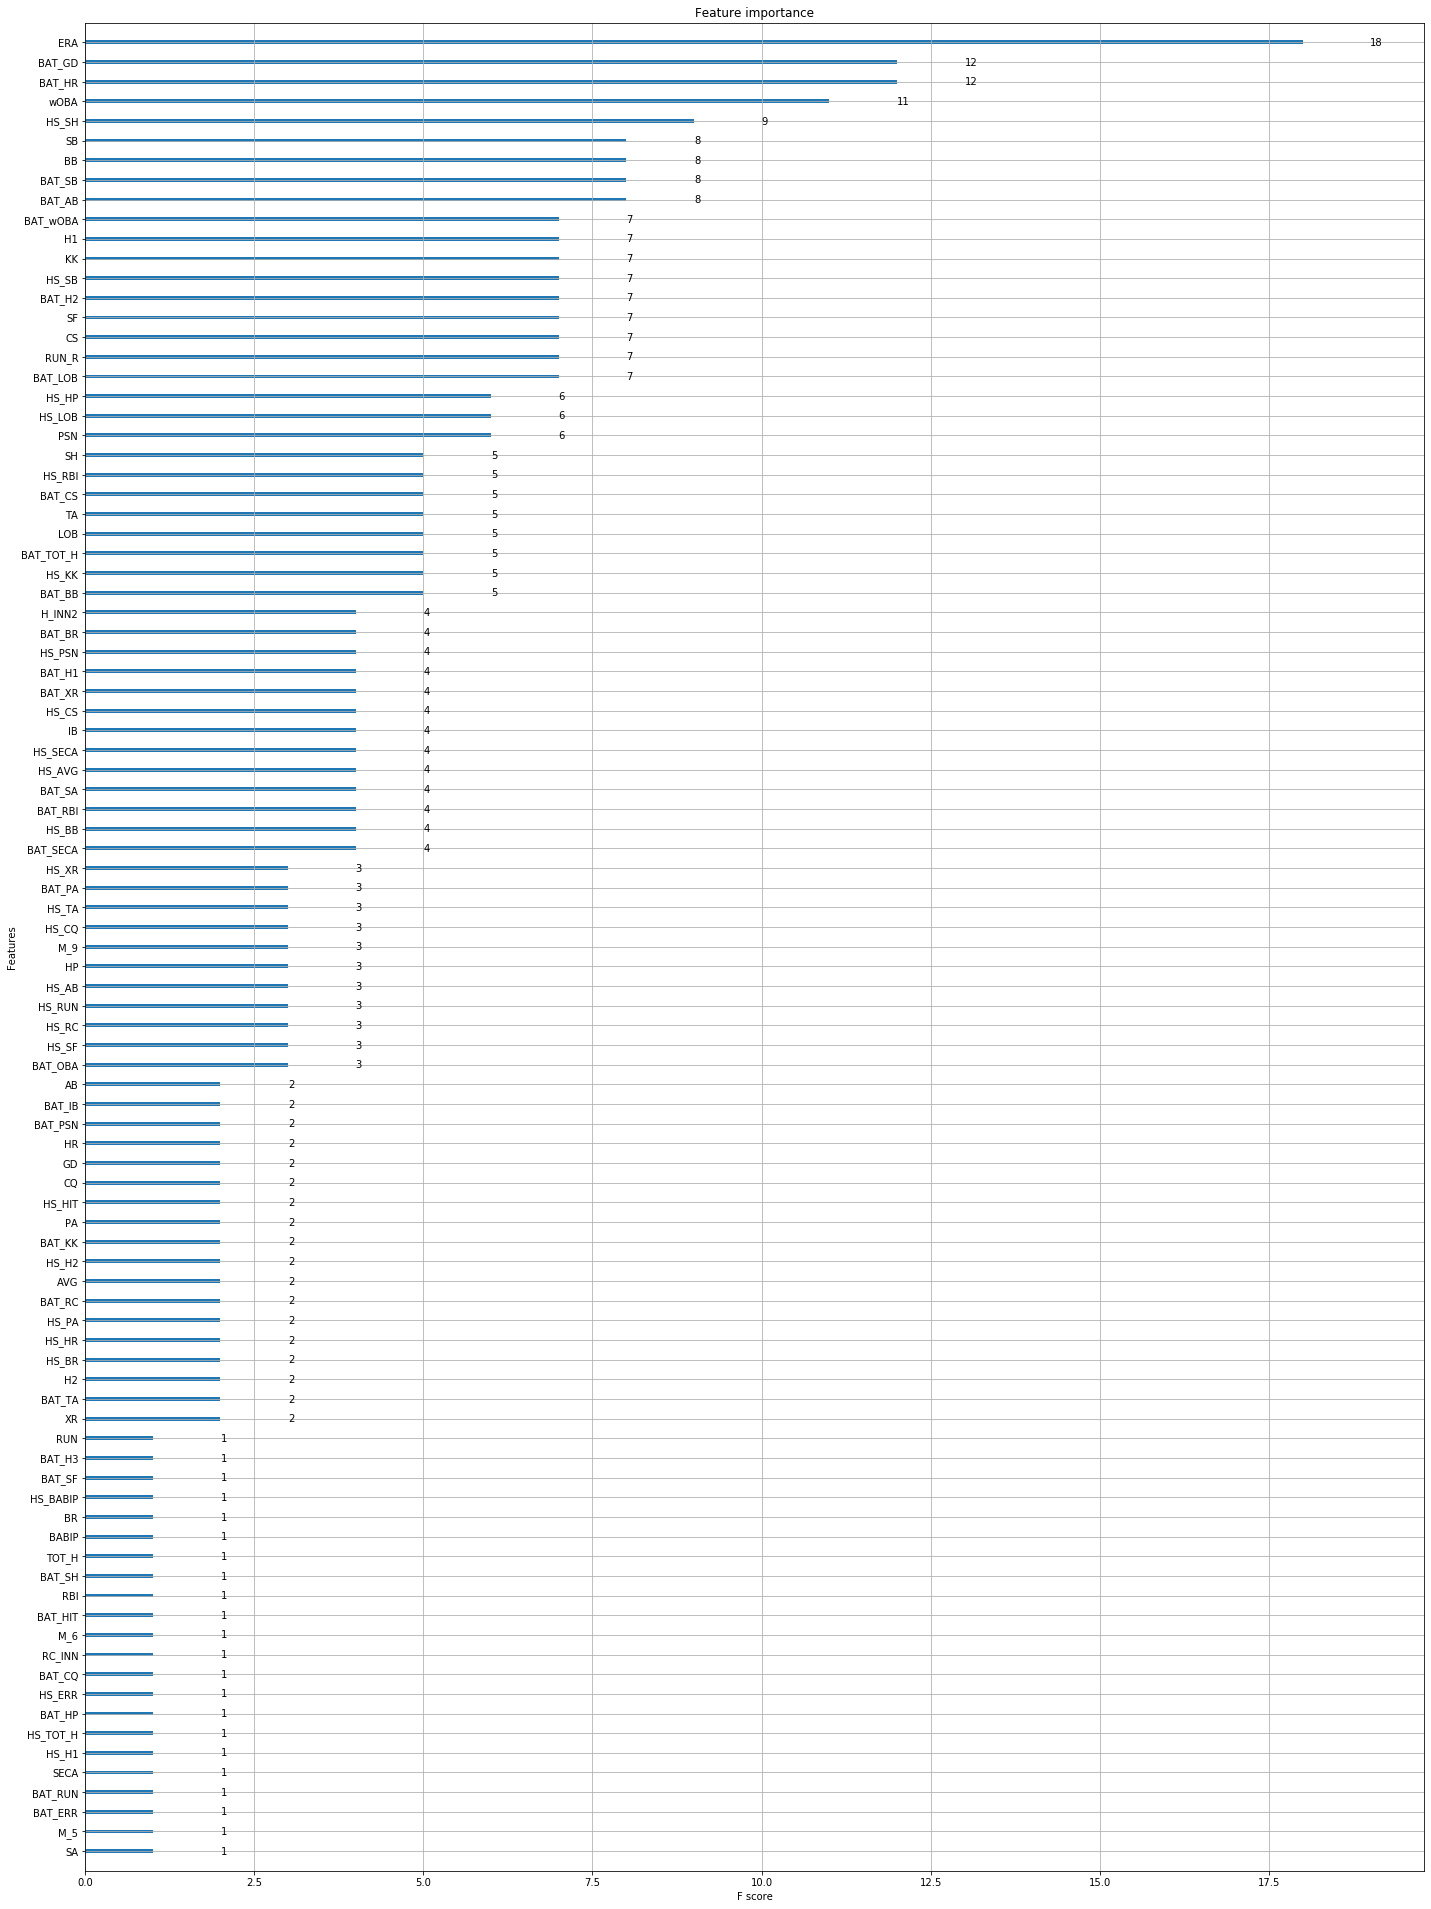

In [132]:
# XGBOOST 안타수 모델 학습
X_features = HIT_ONE1.iloc[:, :-1]
y_label = HIT_ONE1.iloc[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {
         'max_depth': 3,
         'eta': 0.1,
         'objective':'reg:squarederror',
         'eval_metric': 'rmse',
         'early_stopings':10,
         'gamma': 1.0,
         'colsample_bytree':0.3,
         'min_child_weight': 5,
         'subsample': 1.0
         }
num_rounds = 500

wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_hit =xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)

pred = xgb_hit.predict(dtest)



from xgboost import plot_importance # 안타수모델의 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_hit, ax=ax)

In [133]:
# test rmse
HIT_T= HIT_2.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
a = HIT_T.iloc[:, :-1]
b = HIT_T.iloc[:, -1]
atest = xgb.DMatrix(data=a)
xgb_hit_predict = xgb_hit.predict(atest)
print("RMSE':{}".format(math.sqrt(mean_squared_error(xgb_hit_predict, b))) )

RMSE':3.3852797140115682


In [134]:
# XGBOOST 타수 모델 베이지안 최적화
X = AB_ONE1.iloc[:, :-1]
y = AB_ONE1.iloc[:, -1]
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train1, label=y_train1)
dtest = xgb.DMatrix(data=X_test1, label=y_test1)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'rmse',
              'objective':'reg:squarederror',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7, 1.0)}, random_state=0)
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -4.748    |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        | -4.72     |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        | -4.509    |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        | -4.253    |  0.3      |  0.1      |  1.0      |  3.0      |  5.0      |  0.7      |
|  5        | -4.486    |  0.845    |  0.2523   |  0.9849   |  3.153    |  5.016    |  0.8589   |
|  6        | -4.256    |  0.3      |  0.1      |  1.0      |  3.0      |  6.452    |  0.7      |
|  7        | -4.255    |  0.3      |  0.1      |  0.0      |  3.0      |  9.0      |  0.7      |
|  8        | -4.253    |  0.3      |  0.1      |  0.0      |  3.0      |  7.425    |  0.7      |


[0]	train-rmse:31.1116	eval-rmse:31.0063
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:28.0582	eval-rmse:27.9538
[2]	train-rmse:25.3148	eval-rmse:25.2116
[3]	train-rmse:22.8531	eval-rmse:22.7512
[4]	train-rmse:20.6485	eval-rmse:20.548
[5]	train-rmse:18.673	eval-rmse:18.5742
[6]	train-rmse:16.9068	eval-rmse:16.8099
[7]	train-rmse:15.324	eval-rmse:15.2292
[8]	train-rmse:13.9069	eval-rmse:13.8133
[9]	train-rmse:12.6419	eval-rmse:12.5554
[10]	train-rmse:11.523	eval-rmse:11.4458
[11]	train-rmse:10.5352	eval-rmse:10.4695
[12]	train-rmse:9.64795	eval-rmse:9.59362
[13]	train-rmse:8.86516	eval-rmse:8.82423
[14]	train-rmse:8.17821	eval-rmse:8.15103
[15]	train-rmse:7.57823	eval-rmse:7.55859
[16]	train-rmse:7.05146	eval-rmse:7.04224
[17]	train-rmse:6.58555	eval-rmse:6.58515
[18]	train-rmse:6.18575	eval-rmse:6.19638
[19]	train-rmse:5.84428	eval-rmse:5.86568
[20]	train-rmse:5.55177	eval-rm

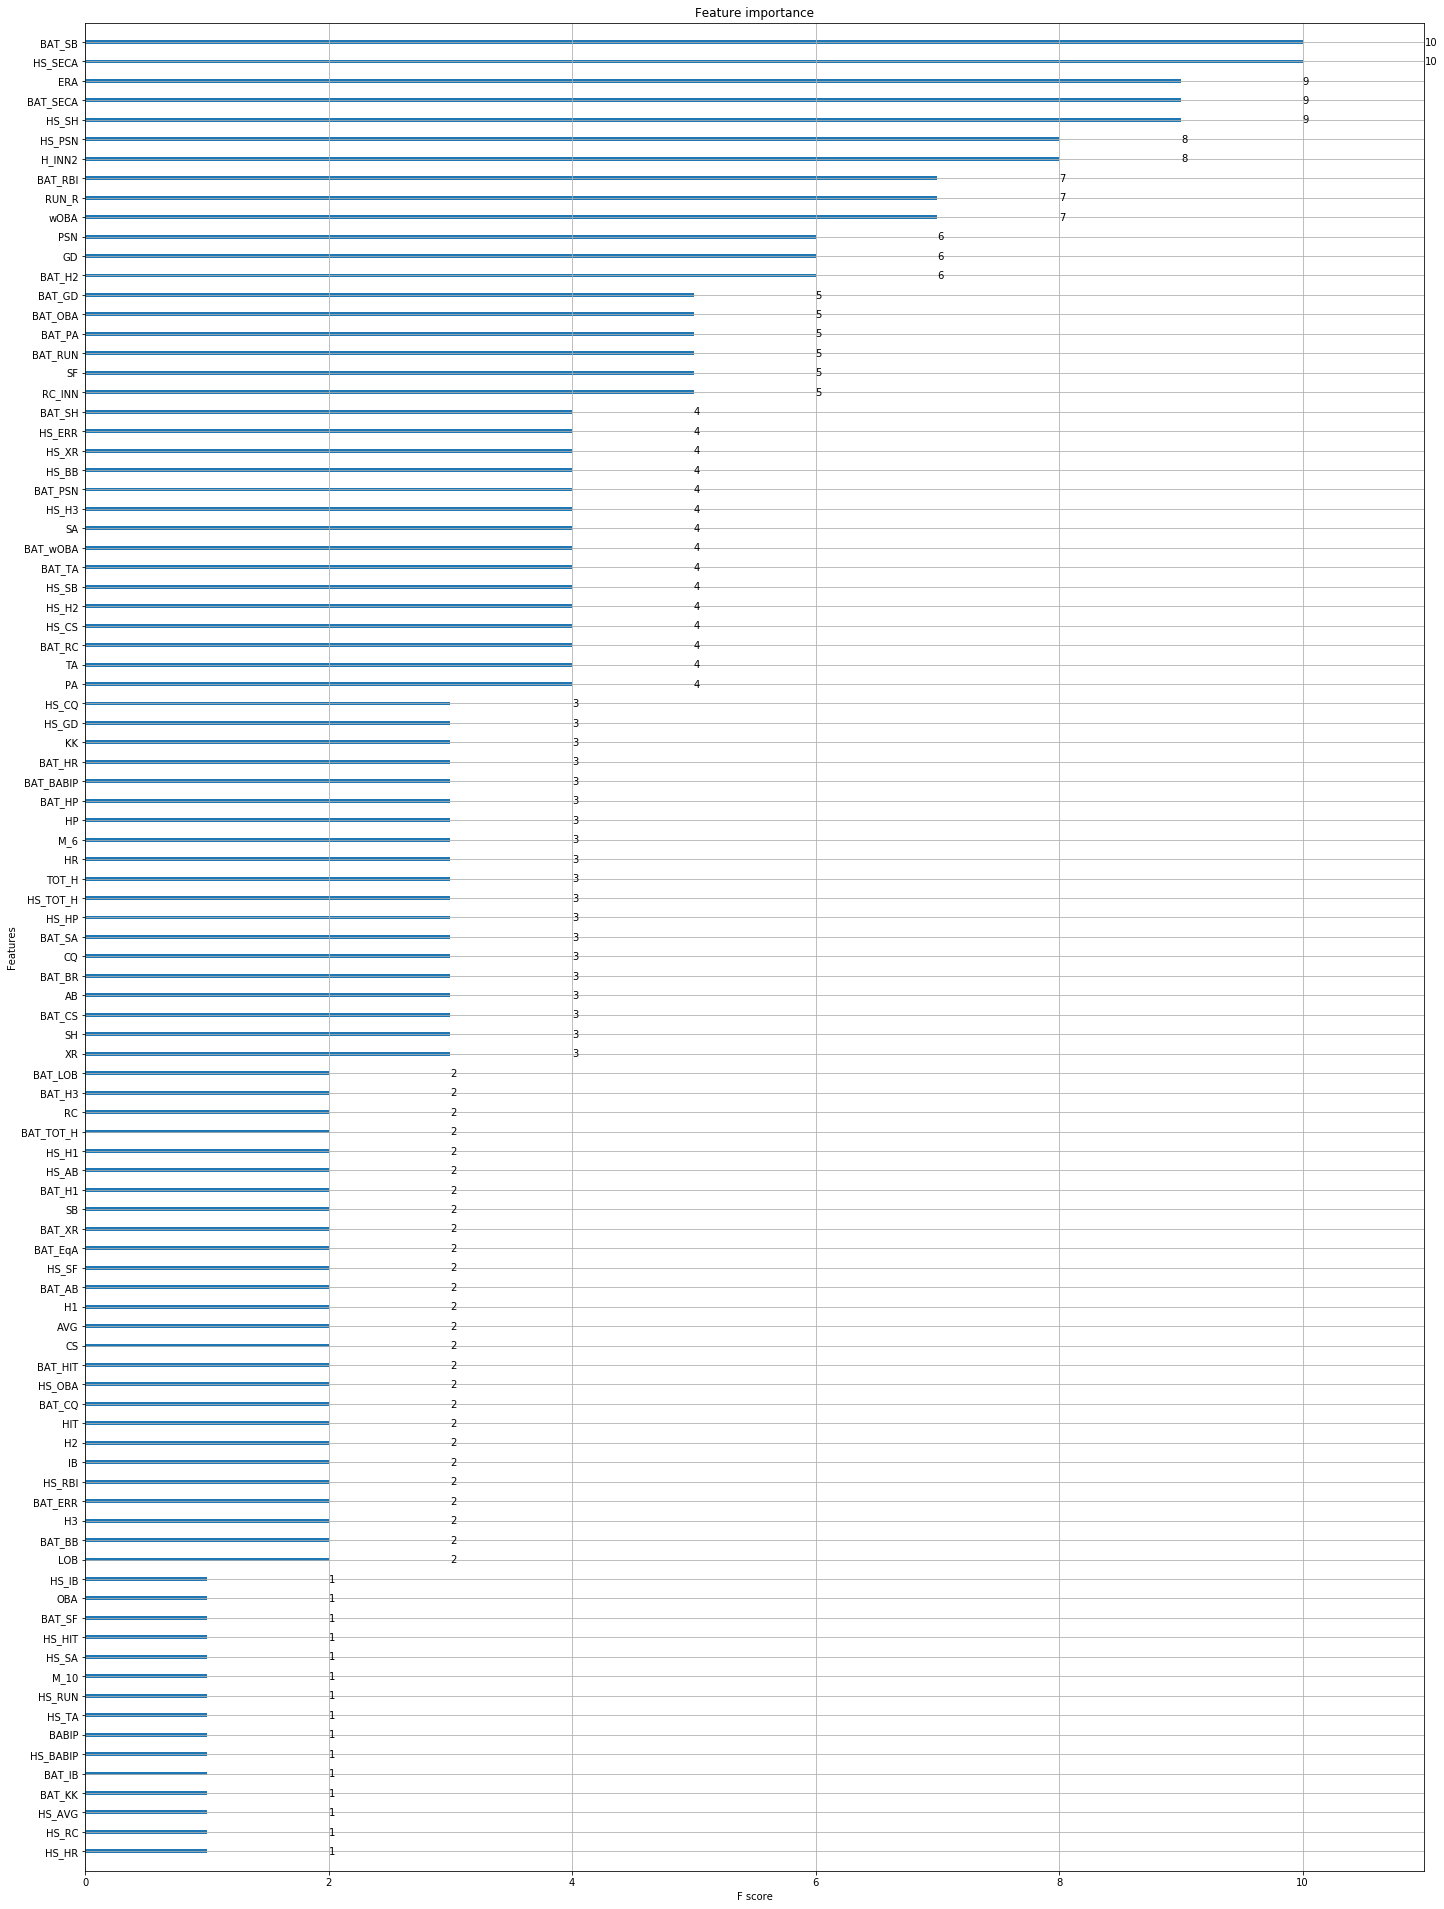

In [135]:
# XGOOST 타수 모델  학습
X_features = AB_ONE1.iloc[:, :-1]
y_label = AB_ONE1.iloc[:, -1]
X_train1, X_test1, y_train1, y_test1=train_test_split(X_features, y_label,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train1, label=y_train1)
dtest = xgb.DMatrix(data=X_test1, label=y_test1)

params = {'max_depth': 3,
         'eta': 0.1,
         'objective':'reg:squarederror',
         'eval_metric': 'rmse',
         'early_stopings':10,
         'gamma': 0,
         'colsample_bytree':0.3,
         'min_child_weight': 7.425,
         'subsample': 0.7
         }
num_rounds = 500

wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_ab =xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)

pred = xgb_ab.predict(dtest)



from xgboost import plot_importance # 타수 모델 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab, ax=ax)

In [136]:
# test rmse
AB_T= AB_2.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
a1 = AB_T.iloc[:, :-1]
b1 = AB_T.iloc[:, -1]
a1test = xgb.DMatrix(data=a1)
xgb_AB_predict = xgb_ab.predict(a1test)
print("RMSE':{}".format(math.sqrt(mean_squared_error(xgb_AB_predict, b1))) )

RMSE':3.9262211296478102


## LIGHTGBM 타율 모델

In [137]:
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [138]:
# LIGHTGBM 안타수 모델 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):
    X = HIT_ONE1.iloc[:, :-1]
    y = HIT_ONE1.iloc[:, -1]

    X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                  test_size=0.2, random_state=0)
    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test, y_test)]
    model.fit(X_train, y_train, eval_metric="rmse", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -3.674    |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -3.678    |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -3.676    |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -3.671    |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -3.681    |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -3.675    |  0.5377   |  0.07369  |  3.199    |  8.817    |  24.31    |  0.8489   |
|  7        | -3.678    |  0.6826   |  0.0725   |  9.997    |  8.994    |  44.82    |  0.8341   |
|  8        | -3.674    |  0.5      |  0.01     |  3.0      |  9.0      |  45.0     |  1.0      |
|  9        | -3.677

[1]	valid_0's rmse: 3.68002	valid_0's l2: 13.5425
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 3.68132	valid_0's l2: 13.5521
[3]	valid_0's rmse: 3.67951	valid_0's l2: 13.5388
[4]	valid_0's rmse: 3.68029	valid_0's l2: 13.5445
[5]	valid_0's rmse: 3.68322	valid_0's l2: 13.5661
[6]	valid_0's rmse: 3.68212	valid_0's l2: 13.558
[7]	valid_0's rmse: 3.68117	valid_0's l2: 13.551
[8]	valid_0's rmse: 3.67763	valid_0's l2: 13.525
[9]	valid_0's rmse: 3.67902	valid_0's l2: 13.5352
[10]	valid_0's rmse: 3.67955	valid_0's l2: 13.5391
[11]	valid_0's rmse: 3.67806	valid_0's l2: 13.5281
[12]	valid_0's rmse: 3.67935	valid_0's l2: 13.5376
[13]	valid_0's rmse: 3.67973	valid_0's l2: 13.5404
[14]	valid_0's rmse: 3.67972	valid_0's l2: 13.5403
[15]	valid_0's rmse: 3.68021	valid_0's l2: 13.5439
[16]	valid_0's rmse: 3.6799	valid_0's l2: 13.5417
[17]	valid_0's rmse: 3.6801	valid_0's l2: 13.5432
[18]	valid_0's rmse: 3.67771	valid_0's l2: 13.5256
[19]	valid_0's rmse: 3.67876	valid

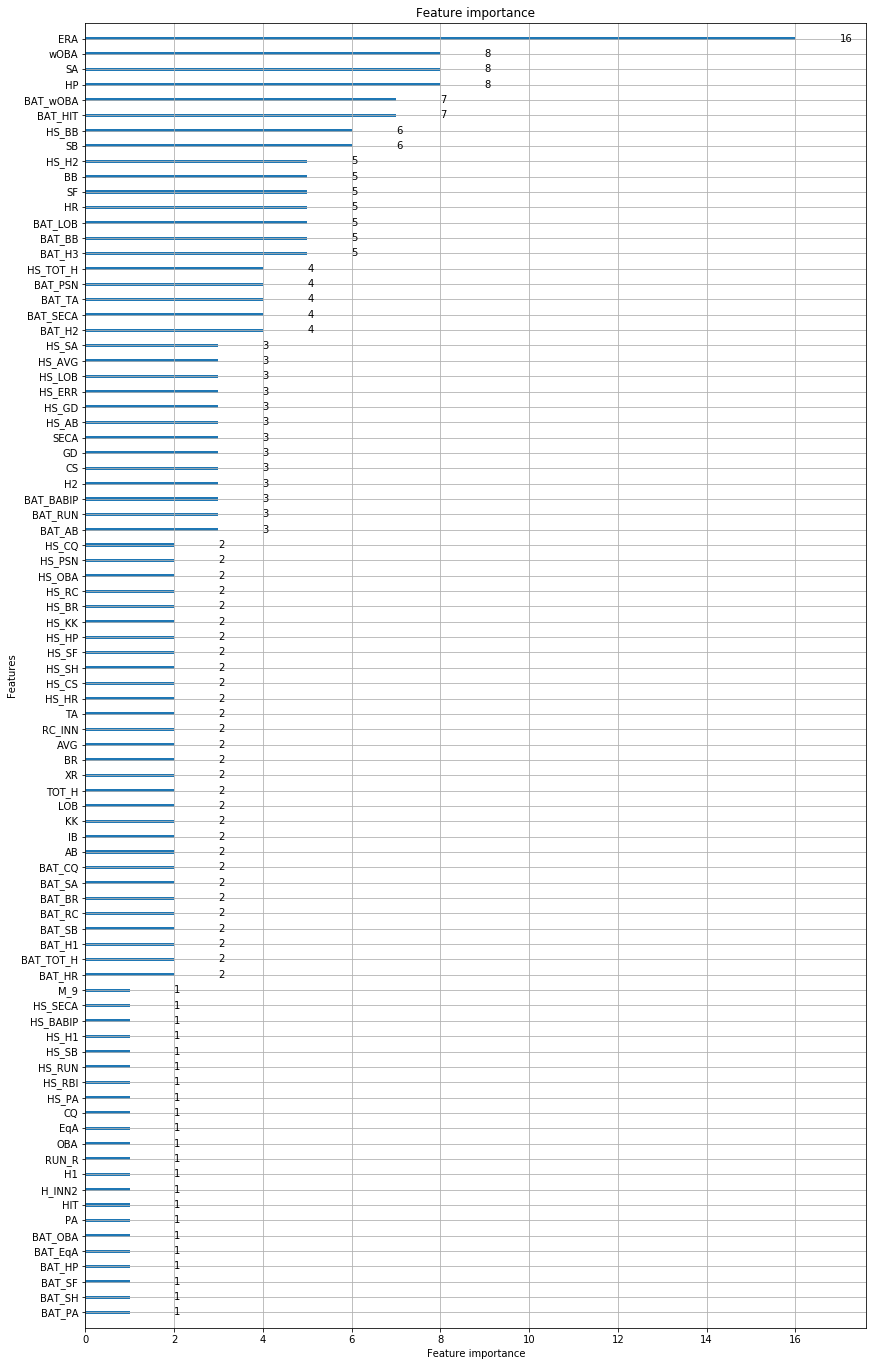

In [139]:
# LIGHTGBM 안타수 모델 학습
h_ftr = HIT_ONE1.iloc[:, :-1]
h_target = HIT_ONE1.iloc[:, -1]
X_train, X_test, y_train, y_test=train_test_split(h_ftr, h_target,
                                                 test_size=0.2, random_state=1)
                        
lgbm_hit = LGBMRegressor(n_estimators=300, learning_rate=0.06745, num_leaves=31, sumbsample=0.9385, colsample_bytree=0.5702, max_depth=9,
                             min_child_weight=8.873)
evals = [(X_test, y_test)]
lgbm_hit.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='rmse', eval_set=evals, verbose=True)
preds = lgbm_hit.predict(X_test)

from lightgbm import plot_importance # 안타수모델의 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm_hit, ax=ax)

In [140]:
# train rmse
lgbm_hit_predict = lgbm_hit.predict(X_train)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_hit_predict, y_train))) )

RMSE':3.5099800986413277


In [141]:
# test rmse
HIT_T= HIT_2.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
a = HIT_T.iloc[:, :-1]
b = HIT_T.iloc[:, -1]
lgbm_hit_predict = lgbm_hit.predict(a)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_hit_predict, b))) )

RMSE':3.3946132798079565


In [142]:
# LIGHTGBM 타수모델 베이지안 최적화 
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):
    X = AB_ONE1.iloc[:, :-1]
    y = AB_ONE1.iloc[:, -1]

    X_train1, X_test1, y_train1, y_test1=train_test_split(X, y,
                                                  test_size=0.2, random_state=0)
    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test1, y_test1)]
    model.fit(X_train1, y_train1, eval_metric="rmse", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5)

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -4.192    |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -4.201    |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -4.203    |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -4.204    |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -4.2      |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -4.222    |  0.7915   |  0.2058   |  9.692    |  5.734    |  44.99    |  0.8884   |
|  7        | -4.206    |  0.5097   |  0.08371  |  9.208    |  5.314    |  24.07    |  0.8715   |
|  8        | -4.199    |  0.5077   |  0.05866  |  3.118    |  8.064    |  24.07    |  0.9122   |
|  9        | -4.217

[1]	valid_0's rmse: 4.10287	valid_0's l2: 16.8336
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 4.10271	valid_0's l2: 16.8322
[3]	valid_0's rmse: 4.1053	valid_0's l2: 16.8535
[4]	valid_0's rmse: 4.10747	valid_0's l2: 16.8713
[5]	valid_0's rmse: 4.10997	valid_0's l2: 16.8918
[6]	valid_0's rmse: 4.10707	valid_0's l2: 16.868
[7]	valid_0's rmse: 4.10666	valid_0's l2: 16.8646
[8]	valid_0's rmse: 4.10692	valid_0's l2: 16.8668
[9]	valid_0's rmse: 4.10811	valid_0's l2: 16.8766
[10]	valid_0's rmse: 4.10843	valid_0's l2: 16.8792
[11]	valid_0's rmse: 4.11001	valid_0's l2: 16.8922
[12]	valid_0's rmse: 4.1037	valid_0's l2: 16.8403
[13]	valid_0's rmse: 4.10488	valid_0's l2: 16.85
[14]	valid_0's rmse: 4.10712	valid_0's l2: 16.8684
[15]	valid_0's rmse: 4.10364	valid_0's l2: 16.8399
[16]	valid_0's rmse: 4.10557	valid_0's l2: 16.8557
[17]	valid_0's rmse: 4.11374	valid_0's l2: 16.9228
[18]	valid_0's rmse: 4.1117	valid_0's l2: 16.9061
[19]	valid_0's rmse: 4.11639	valid_

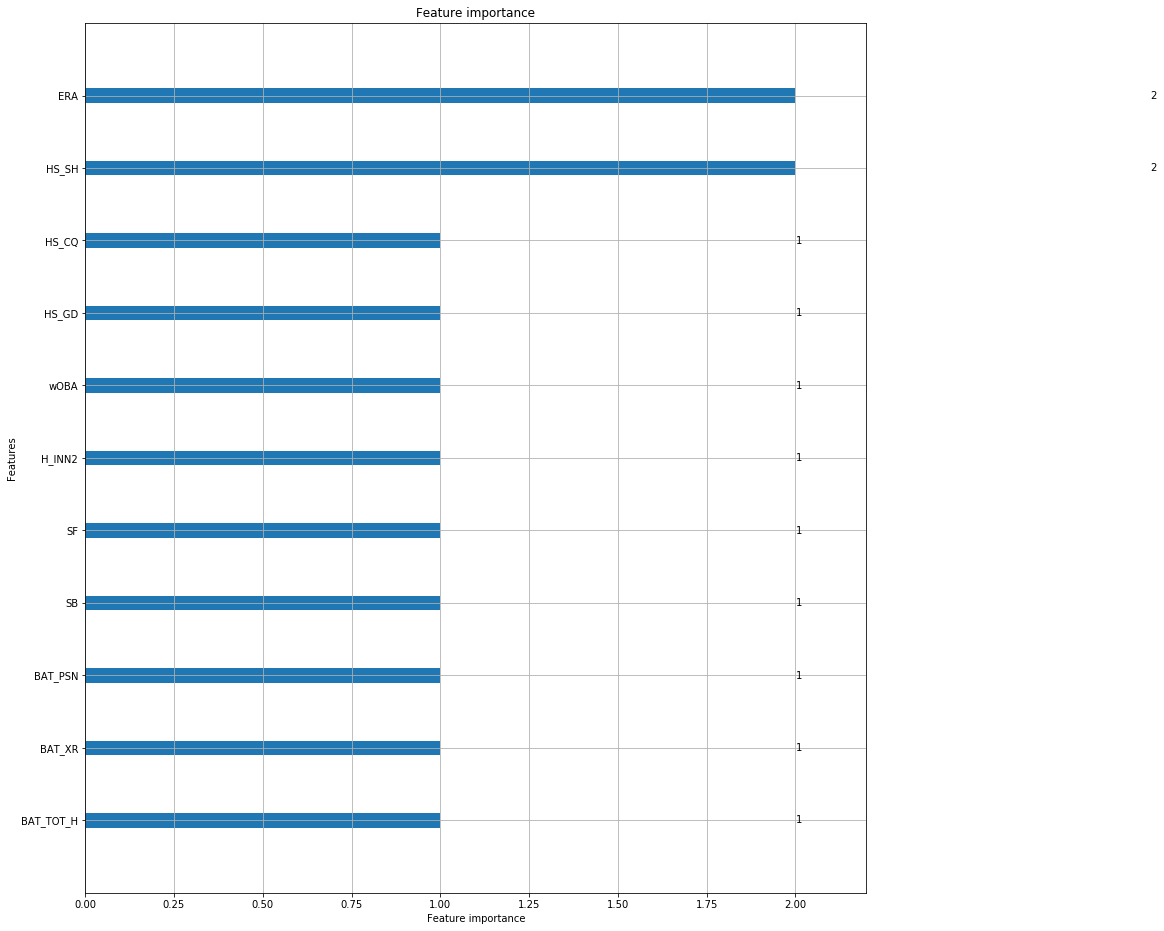

In [143]:
# LIGHTGBM 타수 모델 학습
h_ftr = AB_ONE1.iloc[:, :-1]
h_target = AB_ONE1.iloc[:, -1]
X_train1, X_test1, y_train1, y_test1=train_test_split(h_ftr, h_target,
                                                 test_size=0.2, random_state=1)
                        
lgbm_ab = LGBMRegressor(n_estimators=300, learning_rate=0.2189, num_leaves=27, sumbsample=0.8185, colsample_bytree=0.7085, max_depth=3,
                             min_child_weight=6.209)
evals = [(X_test1, y_test1)]
lgbm_ab.fit(X_train1, y_train1, early_stopping_rounds=100, eval_metric='rmse', eval_set=evals, verbose=True)
preds = lgbm_ab.predict(X_test1)

from lightgbm import plot_importance # 타수 모델 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 16))
plot_importance(lgbm_ab, ax=ax)

In [144]:
# train rmse
lgbm_ab_predict = lgbm_ab.predict(X_train1)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_ab_predict, y_train1))) )

RMSE':4.143957855954779


In [145]:
# test rmse
AB_T= AB_2.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
a1 = AB_T.iloc[:, :-1]
b1 = AB_T.iloc[:, -1]
lgbm_ab_predict = lgbm_ab.predict(a1)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_ab_predict, b1))) ) 

RMSE':3.927037878376611


##  MLP 타율 모델

In [146]:
# MLP 안타수 모델
h_ftr = HIT_ONE1.iloc[:,:-1]
h_target = HIT_ONE1.iloc[:,-1]


In [147]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(h_ftr)
HIT_ONE_scaled = scaler.transform(h_ftr)

HIT_scaled = pd.DataFrame(data=HIT_ONE_scaled)

In [148]:
# MLP 모델 생성 -> 배치정규화 드롭아웃 적용
from keras import models
from keras import layers

mlp_hit = models.Sequential()
mlp_hit.add(layers.Dense(109, activation='relu',
                          input_shape=(HIT_scaled.shape[1],)))
mlp_hit.add(layers.Dropout(0.5))
mlp_hit.add(layers.BatchNormalization())
mlp_hit.add(layers.Dense(70, activation='relu'))
mlp_hit.add(layers.Dropout(0.5))
mlp_hit.add(layers.BatchNormalization())
mlp_hit.add(layers.Dense(70, activation='relu'))
mlp_hit.add(layers.Dense(1))

In [149]:
# MLP 학습
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.3, beta_2=0.999, epsilon=1e-07)
mlp_hit.compile(optimizer=opt,
             loss='mean_squared_error', metrics=['mean_squared_error'])

In [150]:
import warnings
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(HIT_scaled, h_target,
                                                 test_size=0.2, random_state=1)
        
early_stop = keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=10)
EPOCHS=100
        
history = mlp_hit.fit(X_train, y_train,
          epochs=EPOCHS,validation_data = (X_test, y_test), verbose=0, callbacks= early_stop, batch_size=20)

In [151]:
# 조기종료후 마지막 구간 평가지표 확인
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
41,13.511502,13.511502,14.104790,14.104790,41
42,13.400882,13.400882,13.543847,13.543847,42
43,13.484020,13.484020,14.072220,14.072220,43
44,13.410726,13.410726,13.576132,13.576132,44
45,13.556233,13.556233,16.087467,16.087467,45


In [152]:
# 다른 모델들과 비교를 위해 RMSE로 전환
# train rmse
math.sqrt(13.515326)

3.676319627018304

In [153]:
# validation mse
math.sqrt(15.013221)

3.87468979403513

In [154]:
# test RMSE
HIT_T = HIT_2.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
a = HIT_T.iloc[:, :-1]
b = HIT_T.iloc[:, -1]
scaler = StandardScaler()
scaler.fit(h_ftr)
HIT_2_scaled = scaler.transform(a)

HIT2_scaled = pd.DataFrame(data=HIT_2_scaled)
mlp_hit_predict = mlp_hit.predict(HIT2_scaled)
print("RMSE':{}".format(math.sqrt(mean_squared_error(mlp_hit_predict, b))) )

RMSE':3.3718993377669375


In [155]:
# MLP 타수 모델
X = AB_ONE1.iloc[:,:-1]
y = AB_ONE1.iloc[:,-1]

In [156]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train_scaled = pd.DataFrame(data=X_scaled)

In [157]:
# MLP 모델 생성 -> 배치정규화 , 드롭아웃 적용
from keras import models
from keras import layers

mlp_ab = models.Sequential()
mlp_ab.add(layers.Dense(109, activation='relu',
                          input_shape=(X_train_scaled.shape[1],)))
mlp_ab.add(layers.Dropout(0.5))
mlp_ab.add(layers.BatchNormalization())
mlp_ab.add(layers.Dense(70, activation='relu'))
mlp_ab.add(layers.Dropout(0.5))
mlp_ab.add(layers.BatchNormalization())
mlp_ab.add(layers.Dense(70, activation='relu'))
mlp_ab.add(layers.Dense(1))

In [158]:
# MLP 학습
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.3, beta_2=0.999, epsilon=1e-07)
mlp_ab.compile(optimizer=opt,
             loss='mean_squared_error', metrics=['mean_squared_error'])

In [159]:
import warnings
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1=train_test_split(X_train_scaled, y,
                                                 test_size=0.2, random_state=1)
        
early_stop = keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=10)
EPOCHS=100
        
history = mlp_ab.fit(X_train1, y_train1,
          epochs=EPOCHS,validation_data = (X_test1, y_test1), verbose=0, callbacks= early_stop, batch_size=20)

In [160]:
# 조기종료후 마지막 구간 평가지표 확인
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
28,18.576632,18.576632,21.812244,21.812244,28
29,18.669235,18.669233,21.261324,21.261324,29
30,18.404034,18.404032,17.008432,17.008432,30
31,18.435860,18.435860,18.085606,18.085604,31
32,18.346123,18.346123,17.506042,17.506042,32


In [161]:
# 다른 모델들과 성능비교를 위해 RMSE로 전환
# train rmse
math.sqrt(18.629589)

4.316200759927647

In [162]:
# varidation rmse
math.sqrt(19.523880)

4.418583483425429

In [163]:
# test RMSE
AB_T = AB_2.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
a1 = AB_T.iloc[:, :-1]
b1 = AB_T.iloc[:, -1]
scaler = StandardScaler()
scaler.fit(X)
AB_2_scaled = scaler.transform(a1)

AB2_scaled = pd.DataFrame(data=AB_2_scaled)
mlp_ab_predict = mlp_ab.predict(AB2_scaled)
print("RMSE':{}".format(math.sqrt(mean_squared_error(mlp_ab_predict, b1))) )

RMSE':4.123454428721231


## 최종 안타수 모델 XGB 타수모델LGBM으로 테스트

In [164]:
HIT_NC = HIT_2[HIT_2['T_ID']== 'NC']
HIT_OB = HIT_2[HIT_2['T_ID']== 'OB']
HIT_LG = HIT_2[HIT_2['T_ID']== 'LG']
HIT_WO = HIT_2[HIT_2['T_ID']== 'WO']
HIT_HH = HIT_2[HIT_2['T_ID']== 'HH']
HIT_HT = HIT_2[HIT_2['T_ID']== 'HT']
HIT_KT = HIT_2[HIT_2['T_ID']== 'KT']
HIT_LT = HIT_2[HIT_2['T_ID']== 'LT']
HIT_SK = HIT_2[HIT_2['T_ID']== 'SK']
HIT_SS = HIT_2[HIT_2['T_ID']== 'SS']
HIT_HH = HIT_HH.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
HIT_OB = HIT_OB.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
HIT_LG = HIT_LG.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
HIT_WO = HIT_WO.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
HIT_NC = HIT_NC.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
HIT_HT = HIT_HT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
HIT_KT = HIT_KT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
HIT_LT = HIT_LT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
HIT_SK = HIT_SK.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
HIT_SS = HIT_SS.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)

# test셋 팀별 안타수를 보기 위한 분할

In [165]:
AB_NC = AB_2[AB_2['T_ID']== 'NC']
AB_OB = AB_2[AB_2['T_ID']== 'OB']
AB_LG = AB_2[AB_2['T_ID']== 'LG']
AB_WO = AB_2[AB_2['T_ID']== 'WO']
AB_HH = AB_2[AB_2['T_ID']== 'HH']
AB_HT = AB_2[AB_2['T_ID']== 'HT']
AB_KT = AB_2[AB_2['T_ID']== 'KT']
AB_LT = AB_2[AB_2['T_ID']== 'LT']
AB_SK = AB_2[AB_2['T_ID']== 'SK']
AB_SS = AB_2[AB_2['T_ID']== 'SS']
AB_NC = AB_NC.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
AB_OB = AB_OB.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
AB_LG = AB_LG.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
AB_WO = AB_WO.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
AB_HH = AB_HH.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
AB_HT = AB_HT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
AB_KT = AB_KT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
AB_LT = AB_LT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
AB_SK = AB_SK.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)
AB_SS = AB_SS.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'HIT_TARGET','GDAY_DS'], axis =1)

# test셋 팀별 타수를 보기 위한 분할

In [166]:
def xgb_avg(A,B):
    a_test = A.iloc[:, :-1]
    b_test = A.iloc[:, -1]
    ktest = xgb.DMatrix(data=a_test)
    pred = xgb_hit.predict(ktest)

    nam =['col1']
    y = pd.DataFrame(pred, columns=nam)
    y_sum1 = y['col1'].sum()
    y_sum1 # 예측 안타수 합
    
    a_test1 = B.iloc[:, :-1]
    b_test1 = B.iloc[:, -1]
    pred = lgbm_ab.predict(a_test1)
    nam =['col2']
    y = pd.DataFrame(pred, columns=nam)
    y_sum2 = y['col2'].sum()
    y_sum2
    
    HIT_sum1= b_test.sum()
    HIT_sum1
    
    AB_sum2= b_test1.sum()
    AB_sum2
    
    predict_avg = y_sum1 / y_sum2 
    real_avg = HIT_sum1 / AB_sum2
   
    return print('예측 타율:', predict_avg,
                 '실제 타율:', real_avg)

In [167]:
xgb_avg(HIT_WO, AB_WO)
xgb_avg(HIT_NC, AB_NC)
xgb_avg(HIT_OB, AB_OB)
xgb_avg(HIT_LG, AB_LG)
xgb_avg(HIT_HH, AB_HH)
xgb_avg(HIT_HT, AB_HT)
xgb_avg(HIT_KT, AB_KT)
xgb_avg(HIT_LT, AB_LT)
xgb_avg(HIT_SK, AB_SK)
xgb_avg(HIT_SS, AB_SS)

예측 타율: 0.27944870025761487 실제 타율: 0.26587301587301587
예측 타율: 0.28000556461909903 실제 타율: 0.28363636363636363
예측 타율: 0.2885154062169653 실제 타율: 0.30988786952089703
예측 타율: 0.28854405861001525 실제 타율: 0.2672521957340025
예측 타율: 0.27837465670686745 실제 타율: 0.2673611111111111
예측 타율: 0.2902265128153084 실제 타율: 0.2840800762631077
예측 타율: 0.2818593334733833 실제 타율: 0.28730964467005077
예측 타율: 0.2819335740926834 실제 타율: 0.293790546802595
예측 타율: 0.280213082253961 실제 타율: 0.2797558494404883
예측 타율: 0.2824997761954941 실제 타율: 0.2921478060046189


In [168]:
#예측 타율과 실제 타율 비교 
A = [0.27944870025761487,0.28000556461909903,0.2885154062169653,0.28854405861001525,0.27837465670686745,0.2902265128153084,0.2818593334733833,0.2819335740926834,0.280213082253961,0.2824997761954941]
B = [0.26587301587301587,0.28363636363636363,0.30988786952089703,0.2672521957340025,0.2673611111111111,0.2840800762631077,0.28730964467005077,0.293790546802595, 0.2797558494404883,0.2921478060046189]

print("RMSE':{}".format(math.sqrt(mean_squared_error(A, B))) )



RMSE':0.012370414804405186


# 최종 예측

In [169]:
RUN_END_NC = RUN_END[RUN_END['T_ID']== 'NC']
RUN_END_OB = RUN_END[RUN_END['T_ID']== 'OB']
RUN_END_LG = RUN_END[RUN_END['T_ID']== 'LG']
RUN_END_WO = RUN_END[RUN_END['T_ID']== 'WO']
RUN_END_HH = RUN_END[RUN_END['T_ID']== 'HH']
RUN_END_HT = RUN_END[RUN_END['T_ID']== 'HT']
RUN_END_KT = RUN_END[RUN_END['T_ID']== 'KT']
RUN_END_LT = RUN_END[RUN_END['T_ID']== 'LT']
RUN_END_SK = RUN_END[RUN_END['T_ID']== 'SK']
RUN_END_SS = RUN_END[RUN_END['T_ID']== 'SS']
RUN_END_NC= RUN_END_NC.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_OB= RUN_END_OB.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_LG= RUN_END_LG.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_WO= RUN_END_WO.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_HH= RUN_END_HH.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_HT= RUN_END_HT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_KT= RUN_END_KT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_LT= RUN_END_LT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_SK= RUN_END_SK.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_SS= RUN_END_SS.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)


In [170]:
def xgb_avg1(A):
    a_test = A
    
    ktest = xgb.DMatrix(data=a_test)
    pred = xgb_hit.predict(ktest)

    nam =['col1']
    y = pd.DataFrame(pred, columns=nam)
    y_sum1 = y['col1'].sum()
    y_sum1 # 예측 안타수 합
    
    a_test1 = A
    
    
    pred = lgbm_ab.predict(a_test1)
    nam =['col2']
    y = pd.DataFrame(pred, columns=nam)
    y_sum2 = y['col2'].sum()
    y_sum2
    
    
    predict_avg = y_sum1 / y_sum2 
    
   
    return print('예측 타율:', predict_avg)

In [171]:
xgb_avg1(RUN_END_WO)
xgb_avg1(RUN_END_NC)
xgb_avg1(RUN_END_OB)
xgb_avg1(RUN_END_LG)
xgb_avg1(RUN_END_HH)
xgb_avg1(RUN_END_HT)
xgb_avg1(RUN_END_KT)
xgb_avg1(RUN_END_LT)
xgb_avg1(RUN_END_SK)
xgb_avg1(RUN_END_SS)

예측 타율: 0.258601449043901
예측 타율: 0.24845124282629988
예측 타율: 0.2655231557156759
예측 타율: 0.2588765826952499
예측 타율: 0.25398215872907437
예측 타율: 0.2633091759726954
예측 타율: 0.2652442036287724
예측 타율: 0.260614854208708
예측 타율: 0.2604212089922237
예측 타율: 0.2625756392546289
